# Analisis Multilayer Percepteron

### Import Modul

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
d_cardio = pd.read_excel('cardio_train.xlsx')
d_cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
print(d_cardio.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [4]:
d_cardio.drop(['id'], axis = 1, inplace = True)
d_cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
d_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [6]:
d_cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
d_cardio=abs(d_cardio)

In [8]:
d_cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.841429,96.632414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,153.991223,188.471505,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
Y = d_cardio.cardio
X = d_cardio
X.drop(['cardio'],axis = 1, inplace = True)

In [10]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.15, random_state=143)

In [11]:
model = MLPClassifier(batch_size = 64)
model.fit(X_train, Y_train)


MLPClassifier(batch_size=64)

In [12]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_pred,Y_test)


In [13]:
print('Untuk test size = 0.15 :', acc)

Untuk test size = 0.15 : 0.6269523809523809


In [14]:

X_train1, X_test1, Y_train1, Y_test1 =train_test_split(X,Y,test_size=0.25, random_state=143)

In [15]:

model2 = MLPClassifier(batch_size = 64)
model2.fit(X_train1, Y_train1)


MLPClassifier(batch_size=64)

In [16]:

y_pred1 = model2.predict(X_test1)
acc1 = accuracy_score(y_pred1,Y_test1)


In [17]:

print('Untuk test size = 0.25  :', acc1)


Untuk test size = 0.25  : 0.49685714285714283


In [18]:

X_train2, X_test2, Y_train2, Y_test2 =train_test_split(X,Y,test_size=0.3, random_state=143)

In [19]:

model3 = MLPClassifier(batch_size = 64)
model3.fit(X_train2, Y_train2)

MLPClassifier(batch_size=64)

In [20]:

y_pred2 = model3.predict(X_test2)
acc2 = accuracy_score(y_pred2,Y_test2)

In [21]:
print('Untuk test size = 0.3  :', acc2)

Untuk test size = 0.3  : 0.670047619047619


Text(0.5, 1.0, 'Grafik Akurasi Terhadap Test Size')

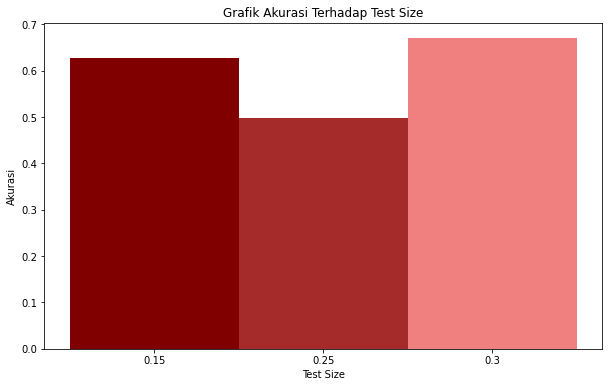

In [22]:
#Grafik Akurasi Terhadap dataset
x=[1,2,3]
y=[acc, acc1, acc2]
plt.figure(figsize=(10,6))
tick_label = ['0.15','0.25','0.3']
plt.bar(x,y,tick_label=tick_label, width =1, color = ['maroon','brown','lightcoral'])

plt.xlabel('Test Size')
plt.ylabel('Akurasi')
plt.title('Grafik Akurasi Terhadap Test Size')

In [23]:
import statistics
data = [acc,acc1,acc2]
x = statistics.mean(data)

In [24]:
print(x)

0.5979523809523809


## Terimakasih